# Sales & Demand Forecasting for Businesses

#### Forecast Interpretation
The historical sales data shows an overall increasing trend with occasional seasonal spikes.
The Linear Regression model predicts a steady upward growth in sales over the next 6 months.
Although the model captures long-term trends, it does not fully capture short-term fluctuations or seasonal variations.

##### How This Forecast Can Help a Business
This forecast can be used by the company to plan inventory levels ahead of time, guaranteeing that there is enough stock to satisfy anticipated demand while lowering the costs associated with excess inventory. Management can get ready for incremental increases in product demand because the model forecasts steady growth.
The forecast aids in budgeting and cash flow management by offering projected future revenue trends, which further supports financial planning. Projected sales growth can be used to inform staffing decisions, enabling controlled growth as opposed to haphazard hiring.
Additionally, the company can maximize profitability by coordinating marketing campaigns and promotional activities with periods of high demand by examining historical spikes in the dataset.
All things considered, this prediction lessens uncertainty and permits data-driven decision-making.

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ajaya\sales_forecasting_project\data\superstore.csv",encoding='latin1')
print(df.head())
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [2]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df.isnull().sum())
df = df.drop_duplicates()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [3]:
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum().reset_index()
print(monthly_sales.head())

  Order Date      Sales
0 2014-01-31  14236.895
1 2014-02-28   4519.892
2 2014-03-31  55691.009
3 2014-04-30  28295.345
4 2014-05-31  23648.287


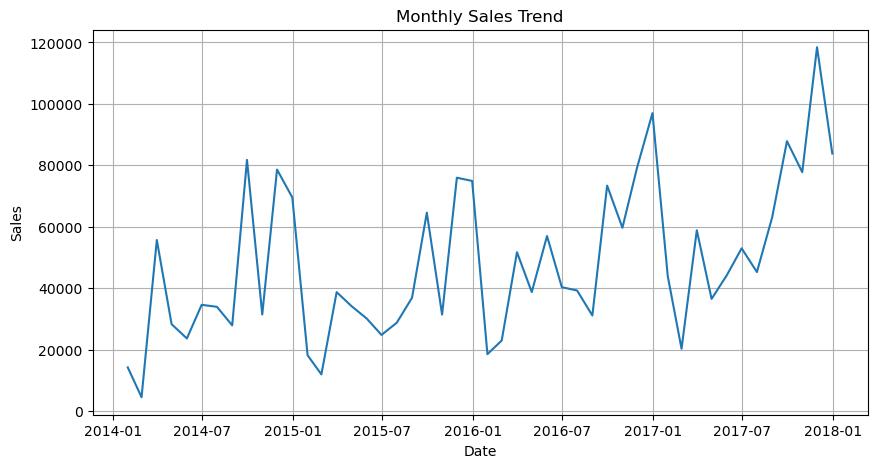

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


The graph shows that sales have been rising over time, particularly since 2016. However, there are a number of fluctuations in sales. Extremely high spikes (above 100,000) occur in some months; these could be brought on by special offers, discounts, or seasonal demand. The graph's overall flow shows a developing company with monthly performance variations.

In [5]:
import numpy as np

monthly_sales['Time'] = np.arange(len(monthly_sales))


In [6]:
from sklearn.linear_model import LinearRegression

X = monthly_sales[['Time']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

monthly_sales['Predicted'] = model.predict(X)

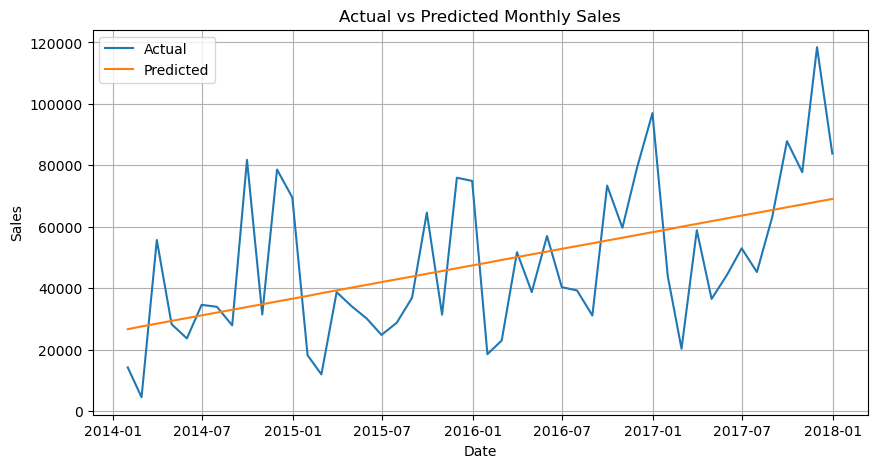

In [7]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label='Actual')
plt.plot(monthly_sales['Order Date'], monthly_sales['Predicted'], label='Predicted')
plt.title("Actual vs Predicted Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


The actual monthly sales (blue line) and the sales forecasted by the Linear Regression model (orange line) are shown in this graph. The orange line is the model's prediction based on the general trend, and the blue line displays the dataset's actual sales values.
The anticipated line, which depicts the overall growth trend of the company, is smooth and increases steadily. However, there are notable ups and downs in the actual sales. This indicates that while seasonal variations and abrupt spikes in sales are not captured by the model, it does capture the long-term upward trend. The model provides a good estimate of the direction of growth overall, but it does not account for short-term fluctuations.

In [8]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, monthly_sales['Predicted'])
print("MAE:", mae)


MAE: 17457.725724823373


In [9]:
monthly_sales['Order Date'] = pd.to_datetime(monthly_sales['Order Date'])

In [10]:
model.fit(monthly_sales[['Time']], monthly_sales['Sales'])

LinearRegression()

In [11]:
future_time = pd.DataFrame(np.arange(len(monthly_sales), len(monthly_sales) + 6),columns=['Time'])

In [12]:
future_pred = model.predict(future_time)

In [13]:
last_date = monthly_sales['Order Date'].max()

future_dates = pd.date_range(
    start=last_date,
    periods=7,
    freq='ME'
)[1:]

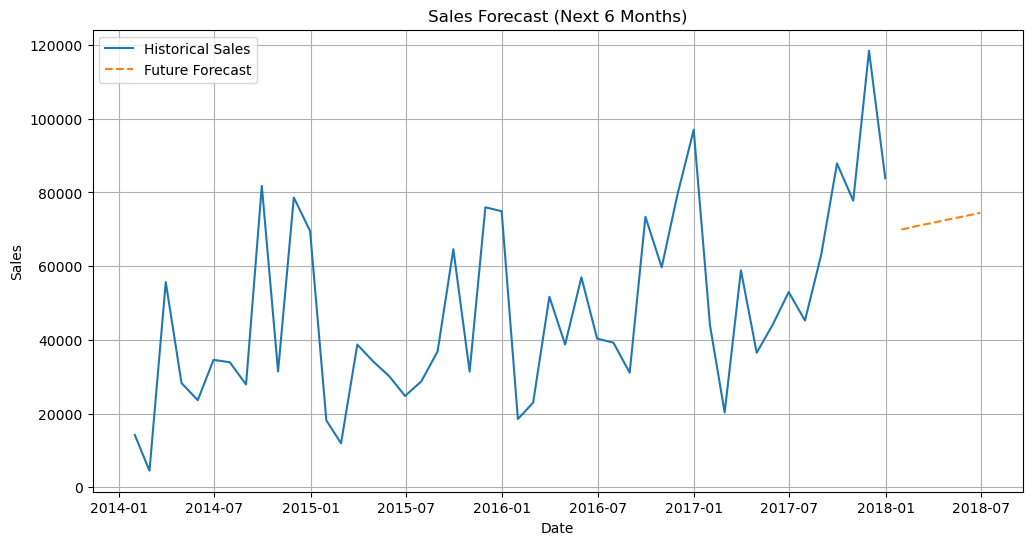

In [19]:
plt.figure(figsize=(12,6))

# Historical Data
plt.plot(monthly_sales['Order Date'],
         monthly_sales['Sales'],
         label='Historical Sales')

# Future Forecast
plt.plot(future_dates,
         future_pred,
         linestyle='--',
         label='Future Forecast')

plt.title("Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

plt.show()


This graph displays the expected sales for the next six months (orange dashed line) as well as the historical monthly sales from 2014 to 2018 (blue line). Monthly sales are not constant and may be impacted by promotions or seasonal demand, according to historical data, which also shows that sales typically rise over time but experience multiple ups and downs.
For the next six months, the forecast line indicates a consistent upward trend. This indicates that the model projects a steady increase in sales. Nevertheless, because the prediction line is smooth, it does not represent the monthly variations observed in the real sales data, but it does capture the general trend.

In [15]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

X_train = train[['Time']]
y_train = train['Sales']

X_test = test[['Time']]
y_test = test['Sales']


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
test = monthly_sales[train_size:].copy()

In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test['Predicted'])
print("Test MAE:", mae)

Test MAE: 17524.349816485563


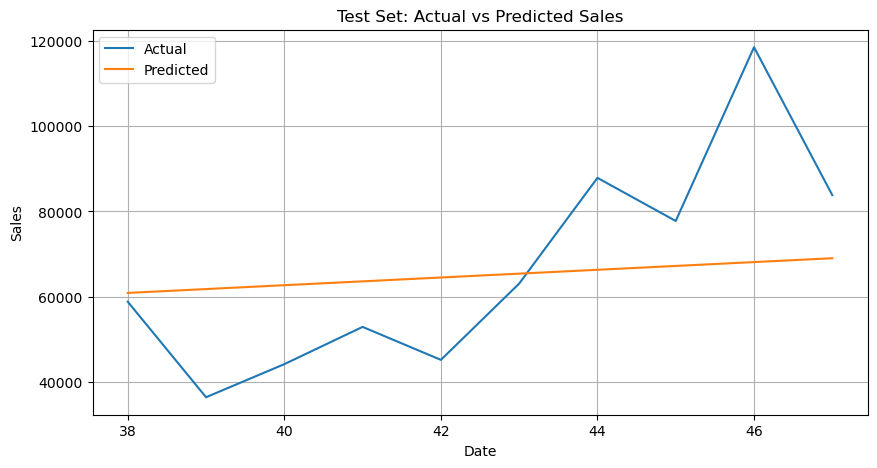

In [18]:
plt.figure(figsize=(10,5))
plt.plot(test.index, y_test, label="Actual")
plt.plot(test.index, test['Predicted'], label="Predicted")
plt.title("Test Set: Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


This graph contrasts the test data's actual sales (blue line) with the anticipated sales (orange line). The orange line displays the values that the model predicted, and the blue line displays the actual sales values.
We can observe that although the actual sales vary greatly, the predicted line shows a consistent upward trend. This indicates that while the model accurately depicts the general growth trend, it is unable to forecast abrupt spikes or dips in monthly sales. The moderate discrepancy between actual and anticipated sales is indicated by the MAE value of roughly 17,524.

##### Conclusion
This project shows how machine learning can be used to produce insightful sales forecasts from real-world retail data. A time-based linear regression approach was used to model and analyze monthly sales trends using 9,994 historical transaction records from the Superstore dataset. The model produced a six-month forecast and accurately depicted the general upward trend in sales. Although the model is good at spotting long-term trends, it struggles to capture seasonal variations and short-term swings.Better staffing, budgeting, and inventory planning decisions are made possible by the forecast, which offers insightful business information. Management can make data-driven decisions, lower uncertainty, and increase operational effectiveness by forecasting future sales trends. This forecasting method amply illustrates how machine learning aids in strategic business planning and decision-making, even though more sophisticated time-series models could improve accuracy even more.